<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_encoding as spc

In [2]:
df = pd.read_csv("../data/autorenew_clean_estandar_sin_out.csv", index_col=0)

In [3]:
df.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,2016-03-24 00:00:00,2016-04-07 03:16:57,2990.0,6.0,49733.0,-0.052593,0.607813,-0.016995
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50,18300.0,5.0,66954.0,0.385348,-0.015437,0.069147
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,Unknown,2016-03-14 00:00:00,2016-04-05 12:47:46,9800.0,8.0,90480.0,0.248162,-0.015437,-0.006227
3,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17,1500.0,6.0,91074.0,-0.210886,0.607813,-0.038530
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21,3600.0,7.0,60437.0,-0.242544,-0.887987,0.036844


In [4]:
# primero vamos a sacar los nombres de las columnas que son de tipo categórico
lista_col_categ = df.select_dtypes(include = "O").columns.tolist()
lista_col_categ

['name',
 'seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'lastSeen']

In [5]:
lista_col_categ.remove('name')
lista_col_categ.remove('dateCreated')
lista_col_categ.remove('lastSeen')

In [6]:
lista_col_categ

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

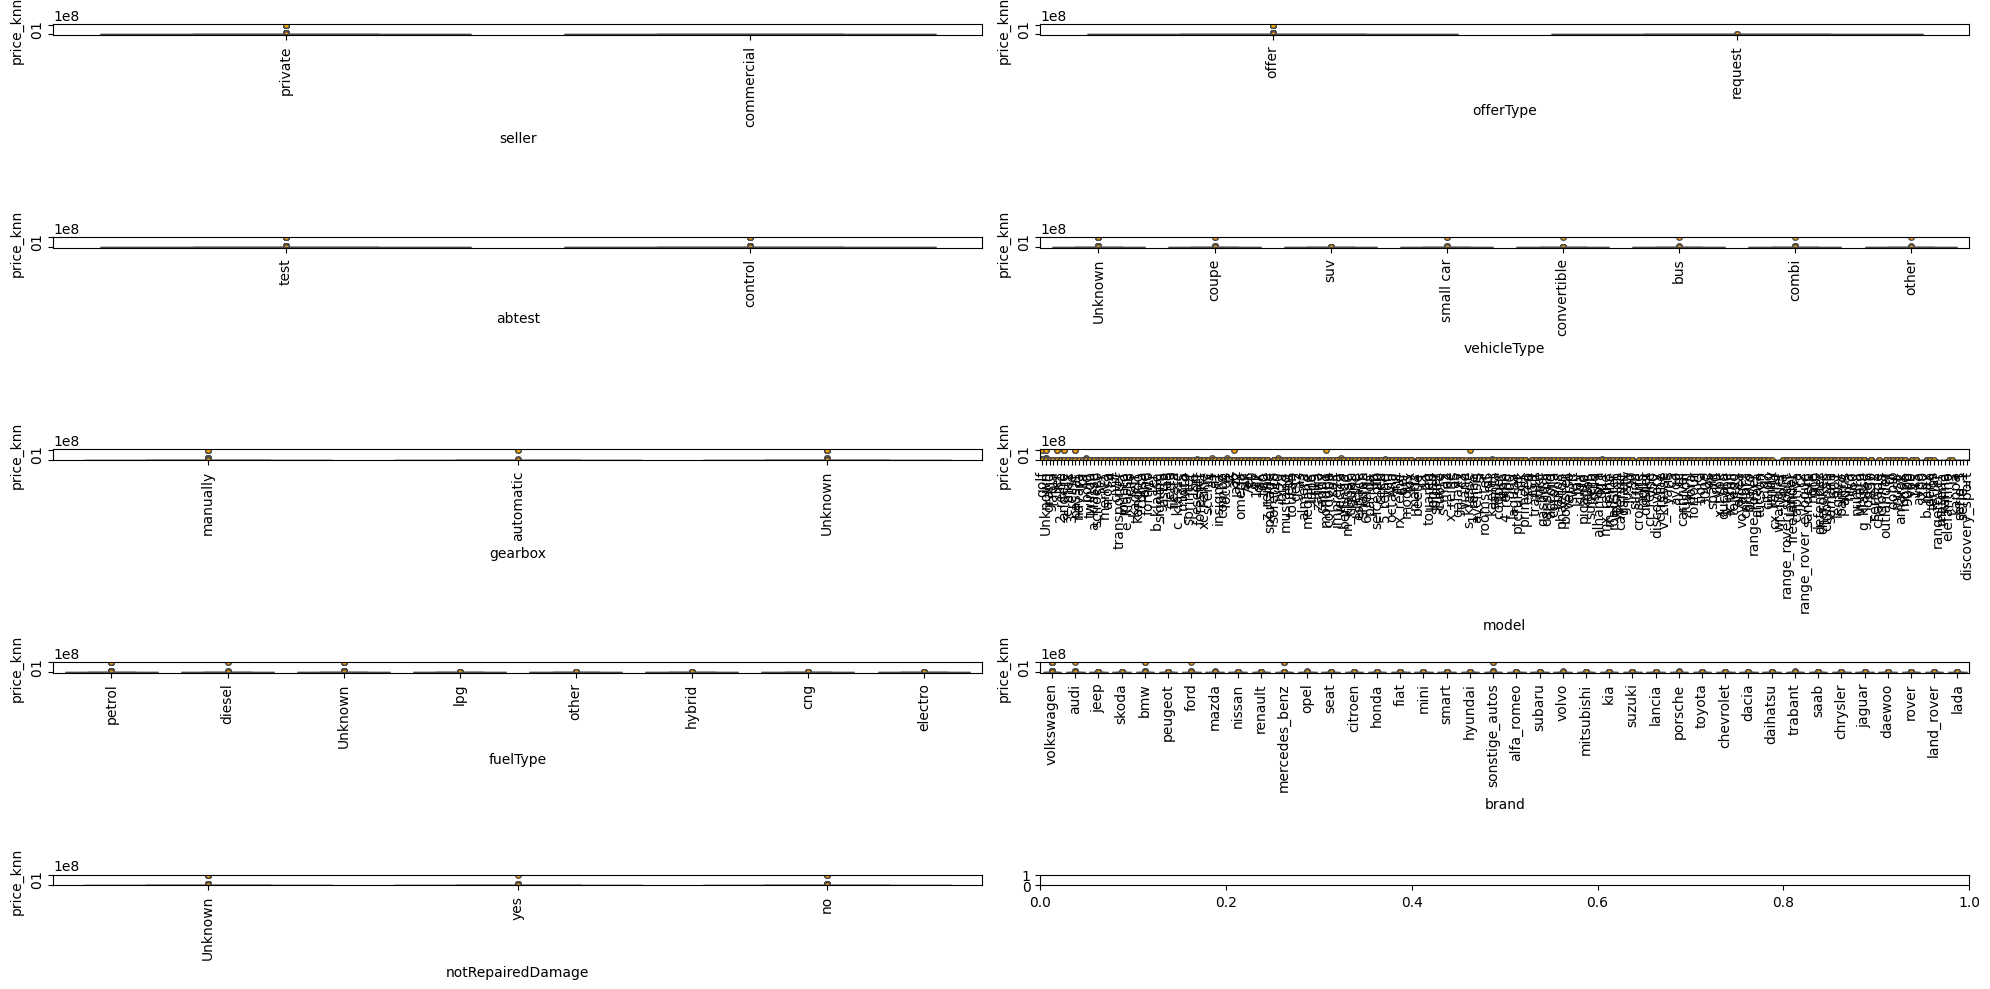

In [7]:
# instanciamos la clase de Encoding
analisis_encoding = spc.Analisis_Visual_Encoding(variable_respuesta = "price_knn", dataframe = df, lista_variables_categorias = lista_col_categ)

# llamamos al método para hacer las gráficas
analisis_encoding.crear_boxplot()

**No nos muestra informacion que podamos entender claramente, seguimos explorando**

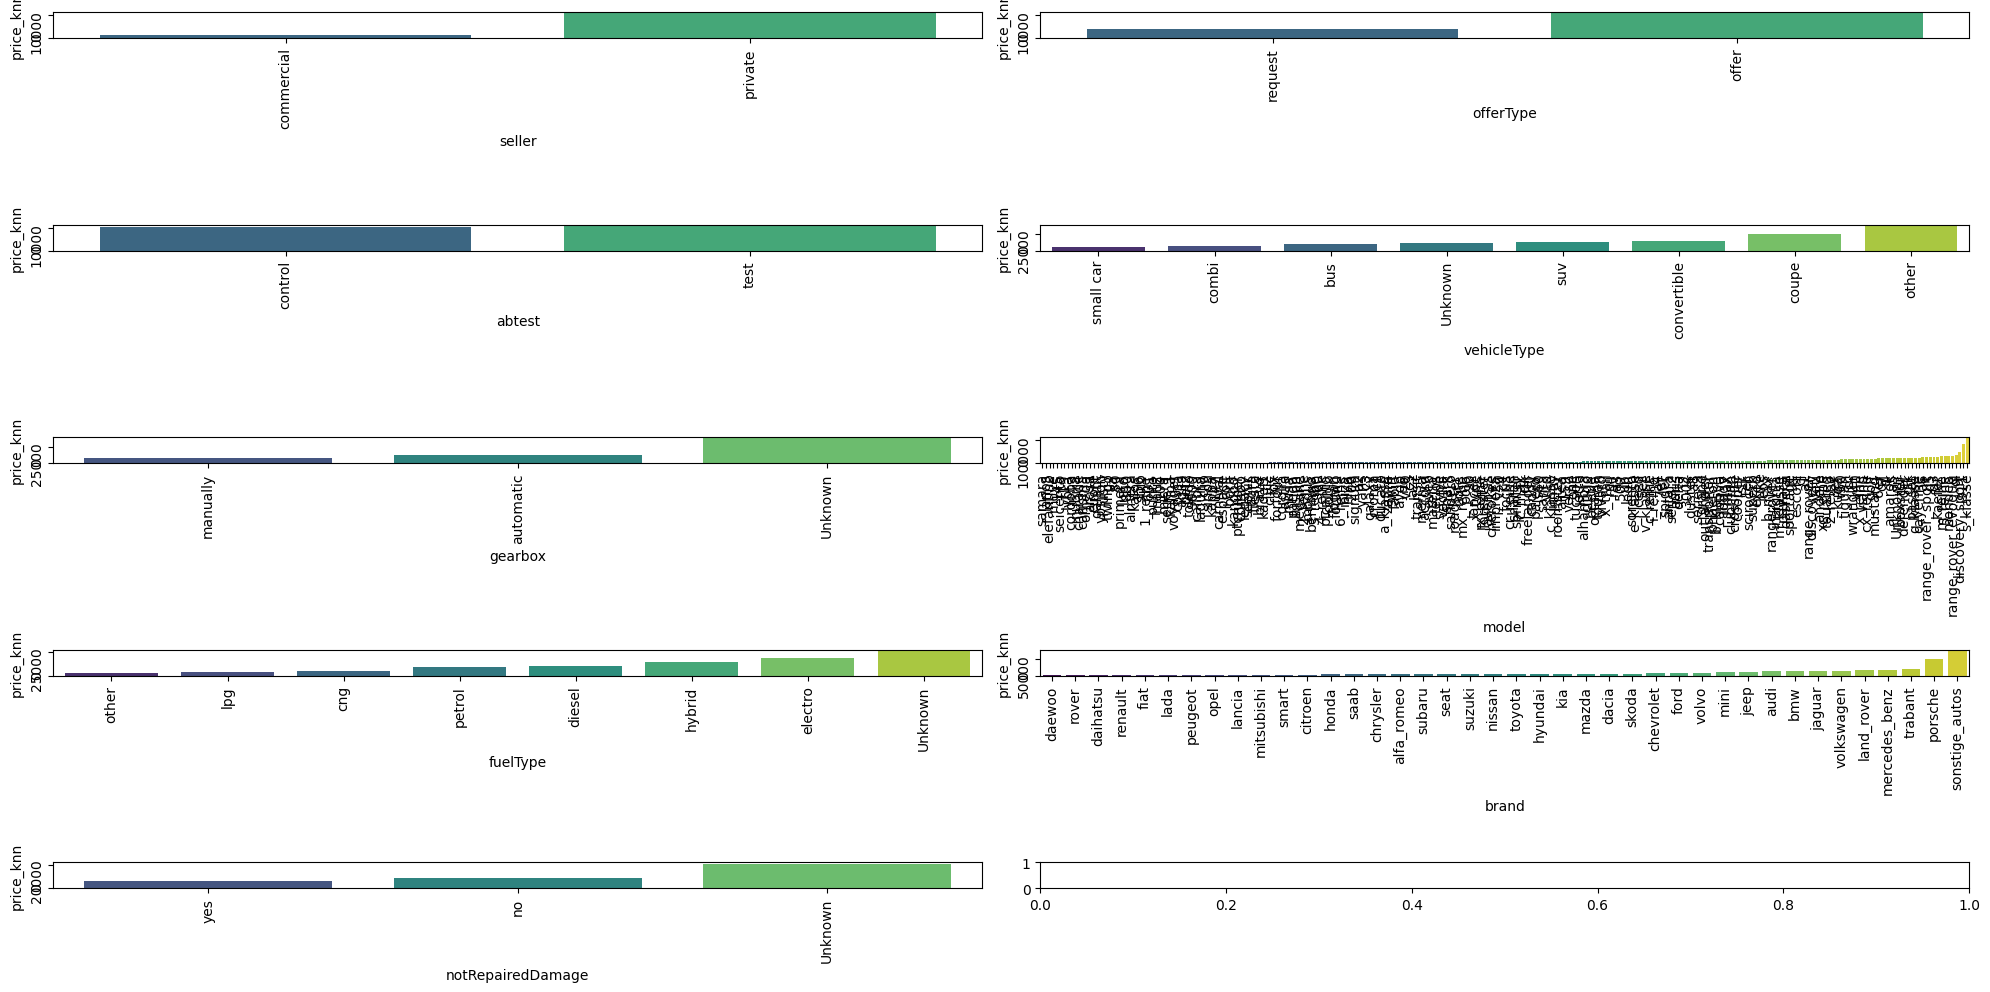

In [8]:
# llamamos al método para hacer las gráficas
analisis_encoding.crear_barplot()

**Se observa que todas las variables categóricas, al ser contrastadas con la variable respuesta, muestran variaciones en sus magnitudes. Esta observación sugiere la posibilidad de una estructura ordenada en las variables.**

In [9]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = spc.Asunciones(dataframe = df, columna_numerica = "price_knn")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = spc.TestEstadisticos(df, "price_knn", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable SELLER
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable seller las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['private', 'commercial']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 829464.0
Valor p: 0.14273949076594813
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable OFFERTYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable offerType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['offer', 'request']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 3403609.5
Valor p: 0.0015648933204588144
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable ABTEST
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 17204954501.0
Valor p: 0.4776390461488377
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other']

Realizando test de K...
Estadístico del test de Kruskal-Wallis: 44687.838956208325
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
14,16852.9106,0.0306,855.3191,32850.5021,combi-coupe
23,-18964.3041,0.0062,-34686.0080,-3242.6002,coupe-small car



###########################

Estamos analizando la variable GEARBOX
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'Unknown']

Realizando test de K...
Estadístico del test de Kruskal-Wallis: 35847.4802389546
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-26106.4117,0.0,-38013.5589,-14199.2645,Unknown-automatic
1,-31289.3047,0.0,-42271.7975,-20306.8119,Unknown-manually



###########################

Estamos analizando la variable MODEL
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable model las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['golf', 'Unknown', 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max', '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse', 'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter', 'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one', 'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo', 'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', 'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'col

,meandiff,p-adj,lower,upper,group_diff
2165,104758.9965,0.0386,1383.3590,208134.6341,2_reihe-s_klasse
3838,99897.9608,0.0447,581.3373,199214.5843,5er-s_klasse
7258,99303.3382,0.0421,884.7225,197721.9540,a4-s_klasse
10247,104850.3702,0.0124,6670.4919,203030.2486,astra-s_klasse
13613,101248.0322,0.0333,2073.0153,200423.0492,c_klasse-s_klasse
17873,105964.2669,0.0084,8377.3709,203551.1630,corsa-s_klasse
19940,100018.4165,0.0499,9.0802,200027.7527,e_klasse-s_klasse
20983,105283.8938,0.0257,3434.2208,207133.5669,fiesta-s_klasse
21128,102012.5906,0.0465,390.2490,203634.9321,focus-s_klasse
28718,102627.4655,0.0171,5188.0150,200066.9161,polo-s_klasse



###########################

Estamos analizando la variable FUELTYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'Unknown', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de K...
Estadístico del test de Kruskal-Wallis: 48456.31504862207
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
1,-15377.3154,0.0034,-27582.7756,-3171.8552,Unknown-diesel
6,-17016.3682,0.0002,-28448.5268,-5584.2096,Unknown-petrol



###########################

Estamos analizando la variable BRAND
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover', 'land_rover', 'lada']

Realizando test de K...
Estadístico del test de Kruskal-Wallis: 50924.807032169905
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
32,69172.3757,0.0202,4107.6441,134237.1073,alfa_romeo-sonstige_autos
70,60523.8845,0.0000,18587.5438,102460.2252,audi-sonstige_autos
107,59337.6068,0.0000,17819.6498,100855.5638,bmw-sonstige_autos
212,69683.4981,0.0002,17012.4574,122354.5389,citroen-sonstige_autos
338,70463.6766,0.0000,23408.0003,117519.3530,fiat-sonstige_autos
367,64798.5641,0.0000,22220.4145,107376.7137,ford-sonstige_autos
395,69486.7424,0.0068,8077.2881,130896.1966,honda-sonstige_autos
422,67910.1071,0.0027,10623.0038,125197.2104,hyundai-sonstige_autos
497,67686.4625,0.0186,4335.4379,131037.4870,kia-sonstige_autos
583,67598.9290,0.0003,15967.4283,119230.4296,mazda-sonstige_autos



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'yes', 'no']

Realizando test de K...
Estadístico del test de Kruskal-Wallis: 53100.207950491895
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-12201.6025,0.0000,-18536.7219,-5866.4831,Unknown-no
1,-14612.7908,0.0012,-24311.9413,-4913.6404,Unknown-yes



###########################



In [10]:
# diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
#                         "dummies": [], # no metemos ninguna columna porque todas tienen orden
#                         'ordinal' : {}, # no metemos ninguna columna
#                         "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
#                         "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
#                         "target": ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage']
#                         }

diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {}, # no metemos ninguna columna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ['seller']
                        }

In [11]:
# En caso de que queramos aplicar el método solo a una columna
encoding = spc.Encoding(df, diccionario_encoding, "price_knn")
df_hot_encoding = encoding.one_hot_encoding()
df_hot_encoding.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,2016-03-24 00:00:00,2016-04-07 03:16:57,2990.0,6.0,49733.0,-0.052593,0.607813,-0.016995
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50,18300.0,5.0,66954.0,0.385348,-0.015437,0.069147
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,Unknown,2016-03-14 00:00:00,2016-04-05 12:47:46,9800.0,8.0,90480.0,0.248162,-0.015437,-0.006227
3,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17,1500.0,6.0,91074.0,-0.210886,0.607813,-0.038530
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21,3600.0,7.0,60437.0,-0.242544,-0.887987,0.036844


In [12]:
df_target_enconding = encoding.target_encoding()
df_target_enconding.head()

d:\develop\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


MemoryError: Unable to allocate 12.1 GiB for an array with shape (297199, 5457) and data type int64